# Tarea 3
Autores:
- Hernán Francisco Díaz Farías
- María Angélica Parra Mendoza
- Loreto Constanza Zavala Gaete


En el dataset incluido en el sitio web, usted encontrará unas variables asociadas a distintas medidas correspondientes a dos tipos de arroces de Turquía, especie Osmacik y especie Cammeo. Dentro de las variables encontrará las siguientes variables:
- Area: Corresponde al número de pixeles dentro del grano de arroz
- Perimeter: Corresponde a la distancia recorrida por los pixeles del contorno del grano de arroz
- Major_Axis_Length: Corresponde al eje mayor de la elipse (el grano es una elipse en si)
- Minor_Axis_Length: Corresponde al eje menor de la elipse o grano.
- Eccentricity: Corresponde a una medida de qué tan redondo es el grano
- Convex_Area: Conteo de pixeles de la envoltura convexa mínima del grano
- Extent: Corresponde a la relación de la región formada por el grano y el bounding box asociado en la imagen.
- Class: Cammeo u Osmancik.

Con lo anterior, realice lo siguiente:
## 1. Realice una exploración de datos para ver qué datos existen, cuales de ellos entregan información relevante para el problema y cuales no, eliminación (si corresponde) de datos nulos y duplicados, entre otros.
### 1.1 Importar librerías

In [127]:
from scipy.io.arff import loadarff
import pandas as pd
from skimpy import skim
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
## from lightgbm import LGBMClassifier
## from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier, VotingClassifier, BaggingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
import plotly.express as px
from sklearn.decomposition import PCA
RANDOM_STATE = 2024

### 1.2 Cargar datos

In [128]:
data = loadarff('../data/Rice_Cammeo_Osmancik.arff')
df = pd.DataFrame(data[0])
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,b'Cammeo'
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,b'Cammeo'
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,b'Cammeo'
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,b'Cammeo'
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,b'Cammeo'


### 1.3 Exploración de datos
Podemos observar que el dataset contiene 7 variables y una variable de clase.
Revisaremos y limpiaremos la variable clase.


<Axes: xlabel='Class'>

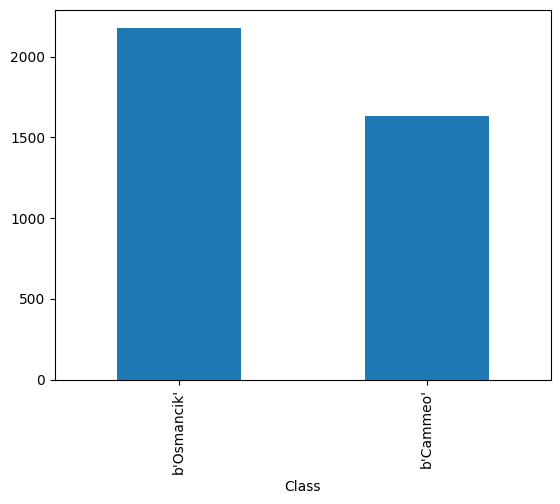

In [129]:
df['Class'].value_counts().plot(kind='bar')

La variable clase sufre de un leve desbalance, aunque no es significativo. Se convertirá con **labelencoder**.

In [130]:
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,0
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,0
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,0
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,0
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,0


In [131]:
le.classes_

array([b'Cammeo', b'Osmancik'], dtype=object)

La variable clase ha sido convertida a valores numéricos, donde 0 corresponde a Cammeo y 1 a Osmancik.

In [132]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3810   │ │ float64     │ 7     │                                                          │
│ │ Number of columns │ 8      │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name         ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ Area                │   0 │     0 │   12670 │    1732 │   7551 │  11370 │  12420 │  13950 │ 18910 │  ▅▇▅▂  │  │
│ │ Perimeter           │   0 │     0 │   454.2 │    35.6 │  359.1 │  426.1 │  448.9 │  483.7 │ 548.4 │  ▅▇▅▅▁ │  │
│ │ Major_Axis_Length   │   0 │     0 │   188.8 │   17.45 │  145.3 │  174.4 │  185.8 │  203.6 │   239 │ ▁▇▇▇▅  │  │
│ │ Minor_Axis_Length   │   0 │     0 │   86.31 │    5.73 │  59.53 │  82.73 │  86.43 │  90.14 │ 107.5 │  ▁▃▇▂  │  │
│ │ Eccentricity        │   0 │     0 │  0.8869 │ 0.02082 │ 0.7772 │ 0.8724 │ 0.8891 │ 0.9026 │ 0.948 │   ▂▇▇▁ │  │
│ │ Convex_Area         │   0 │     0 │   12950 │    1777 │   7723 │  11630 │  12710 │  14280 │ 19100 │  ▅▇▅▂  │  │
│ │ Extent              │   0 │     0 │  0.6619 │ 0.07724 │ 0.4974 │ 0.5989 │ 0.6454 │ 0.7266 │ 0.861 │ ▁▇▆▅▅▁ │  │
│ │ Class               │   0 │     0 │  0.5722 │  0.4948 │      0 │      0 │      1 │      1 │     1 │ ▆    ▇ │  │
│ └─────────────────────┴─────┴───────┴─────────┴─────────┴────────┴────────┴────────┴────────┴───────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Al usar skim, podemos observar que:
- No existen valores nulos
- Los rangos de las variables son distintos, por lo que se deberá estandarizar.
- Las variables son numéricas, por lo que no es necesario realizar más transformaciones por el momento.

In [133]:
df.corr().style.background_gradient(cmap='coolwarm')

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
Area,1.000000,0.966453,0.903015,0.787840,0.352095,0.998939,-0.061184,-0.746400
Perimeter,0.966453,1.000000,0.971884,0.629828,0.544601,0.969937,-0.130923,-0.806572
Major_Axis_Length,0.903015,0.971884,1.000000,0.452092,0.710897,0.903381,-0.139562,-0.827824
Minor_Axis_Length,0.787840,0.629828,0.452092,1.000000,-0.291683,0.787318,0.063366,-0.370355
Eccentricity,0.352095,0.544601,0.710897,-0.291683,1.000000,0.352716,-0.198580,-0.588916
Convex_Area,0.998939,0.969937,0.903381,0.787318,0.352716,1.000000,-0.065826,-0.750424
Extent,-0.061184,-0.130923,-0.139562,0.063366,-0.198580,-0.065826,1.000000,0.117727
Class,-0.746400,-0.806572,-0.827824,-0.370355,-0.588916,-0.750424,0.117727,1.000000


Al observar la matriz de correlación, podemos ver que las variables:
- Area posee una muy alta correlación con Perimeter, Major_Axis_Length, Minor_Axis_Length y Convex_Area.
- Perimeter posee una alta correlación con Major_Axis_Length y Convex_Area.
- Major_Axis_Length posee una alta correlación con Eccentricity y Convex_Area(muy alta).
- Minor_Axis_Length posee una alta correlación con Convex_Area.
- Convex_Area posee una alta correlación con Area, Perimeter y Major_Axis_Length.

## 2. Seleccione las variables que utilizará para realizar la modelación, y con ello determine el modelo a utilizar. Realice la modelación correspondiente y reporte métricas de desempeño del modelo.
### 2.1 Selección de variables mediante varianza de PCA

Debido a la altísima correlación entre varias variables e utilizará el Principal Component Analysis para unificarlas y no perder información útil para el modelo (95% de variabilidad).

In [135]:
pca = PCA(n_components=0.95, random_state=RANDOM_STATE)
X = df.drop(columns='Class')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = df['Class']
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[ 3.81262822,  2.16533103, -0.11779875],
       [ 2.47715767, -0.04529614, -0.51655021],
       [ 2.63855553,  0.6216153 ,  0.86190516],
       ...,
       [-0.436684  , -0.10359442, -0.56126015],
       [-3.58793323,  0.37570163, -0.10597875],
       [-2.55608758, -3.36123712,  0.42790648]])

Al preservar el 95% de la variabilidad, pca crea tres variables que serán las que se usarán en el resto del modelado de machine learning.

### 2.2 Modelación
#### 2.2.1 División de datos

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

Como se mencionó anteriormente, las clases presentan un leve desbalanceo, el cual se corrige con el parametro stratify.

#### 2.2.2 Entrenamiento y evaluación de modelos

Lista de modelos de clasificación a evaluar:

In [136]:
ensamblados = [
        ("svc", SVC(random_state=RANDOM_STATE)),
        ("log_reg", LogisticRegression(random_state=RANDOM_STATE)),
        ("XGBoost", XGBClassifier()),
        ("GradientBoosting", GradientBoostingClassifier(random_state=RANDOM_STATE))
    ]

stack_classifier = StackingClassifier(estimators=ensamblados, final_estimator=RandomForestClassifier())
voting_classifier = VotingClassifier(estimators=ensamblados, voting='hard')
bagging_classifier = BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=RANDOM_STATE)

modelos = {
    "Logistic Regression": LogisticRegression(random_state=RANDOM_STATE),
    "SVM": SVC(random_state=RANDOM_STATE),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=RANDOM_STATE),
    "AdaBoost": AdaBoostClassifier(algorithm='SAMME', random_state=RANDOM_STATE),
    "XGBoost": XGBClassifier(),
    'Stacking': stack_classifier,
    'Voting': voting_classifier,
    'Bagging': bagging_classifier,
}



Entrenar y evaluar modelos:


In [137]:
# Entrenar y evaluar cada modelo
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    print(f"Model: {nombre}")
    print(classification_report(y_test, y_pred))
    print("-" * 60)

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       326
           1       0.95      0.92      0.94       436

    accuracy                           0.93       762
   macro avg       0.93      0.93      0.93       762
weighted avg       0.93      0.93      0.93       762

------------------------------------------------------------
Model: SVM
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       326
           1       0.95      0.93      0.94       436

    accuracy                           0.93       762
   macro avg       0.93      0.93      0.93       762
weighted avg       0.93      0.93      0.93       762

------------------------------------------------------------
Model: KNN
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       326
           1       0.94      0.91      0.93       436

    accurac

Debido a que el resultado de los modelos es muy parecido, se recurrirá a la curva ROC para elegir el mejor modelo.

In [138]:
# Curva ROC
best_auc = 0
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    if auc > best_auc:
        best_auc = auc
        best_model = nombre
    px.line(x=fpr, y=tpr, title=f"ROC Curve - {nombre} - AUC: {auc}").show()
print(f"Best AUC: {best_auc} - Best Model: {best_model}")


Best AUC: 0.9314811166769855 - Best Model: Voting


Podemos observar que el modelo de VotingClassifier es el que mejor desempeño tiene, con un AUC de 0.9314, es decir, predice correctamente el 93.14% de los casos.
Por lo tanto, se realizará una optimización de hiperparámetros para el modelo de **VotingClassifier**.

## 3.Realice una optimización de hiper-parámetros para obtener un mejor desempeño del modelo. Para este punto, las métricas de desempeño reportadas en el punto anterior deben mejorar.

Para hacer finetuning de un modelo de emsamblado, se debe realizar una optimización de hiperparámetros de cada modelo base y del modelo final. Por la cantidad de hiperparámetros, se realizará una búsqueda con RandomizedSearchCV, ya que GridSearchCV es muy costoso computacionalmente y tomaría alrededor de 9 horas en ejecutarse.
Este proceso realizará una búsqueda aleatoria de combinaciones de hiperparámetros, evaluando cada combinación con validación cruzada.

In [67]:
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': [0.1, 1, 2]
}

param_grid_log_reg = {
    'C': [0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

param_grid_xgboost = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

param_grid_gb = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

A continuación, se realizará la optimización de hiperparámetros.
Nota: refit permite ajustar el modelo con los mejores hiperparámetros encontrados.

In [144]:
# Realizar la búsqueda de hiperparámetros para cada estimador
svc = SVC(probability=True, random_state=RANDOM_STATE)
log_reg = LogisticRegression(random_state=RANDOM_STATE)
xgboost = XGBClassifier(random_state=RANDOM_STATE)
gradientboosting = GradientBoostingClassifier(random_state=RANDOM_STATE)


grid_search_svc = GridSearchCV(estimator=svc, param_grid=param_grid_svc, n_jobs=-1, cv=5,
                                 scoring='roc_auc')
grid_search_log_reg = GridSearchCV(estimator=log_reg, param_grid=param_grid_log_reg, n_jobs=-1,
                                     cv=5, scoring='roc_auc')
grid_search_xgboost = GridSearchCV(estimator=xgboost, param_grid=param_grid_xgboost, n_jobs=-1,
                                     cv=5, scoring='roc_auc')
grid_search_gradientboosting = GridSearchCV(estimator=xgboost, param_grid=param_grid_gb,
                                              n_jobs=-1, cv=5, scoring='roc_auc')

grid_search_svc.fit(X_train, y_train)
grid_search_log_reg.fit(X_train, y_train)
grid_search_xgboost.fit(X_train, y_train)
grid_search_gradientboosting.fit(X_train, y_train)

# Obtener los mejores estimadores
best_svc = grid_search_svc.best_estimator_
best_log_reg = grid_search_log_reg.best_estimator_
best_xgboost = grid_search_xgboost.best_estimator_
best_gradientboost = grid_search_gradientboosting.best_estimator_

# Crear el VotingClassifier con los mejores estimadores
voting_classifier = VotingClassifier(estimators=[
    ('svc', best_svc),
    ('log_reg', best_log_reg),
    ('xgboost', best_xgboost),
    ('gradientboosting', best_gradientboost)
], voting='hard', n_jobs=-1)

# Ajustar el VotingClassifier
voting_classifier.fit(X_train, y_train)

# Evaluar el modelo
y_pred = voting_classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

G:\pythonProject\machine_learning_2\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

G:\pythonProject\machine_learning_2\.venv\lib\site-packages\xgboost\core.py:158: UserWarning:

[22:44:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.




              precision    recall  f1-score   support

           0       0.90      0.94      0.92       326
           1       0.95      0.92      0.94       436

    accuracy                           0.93       762
   macro avg       0.93      0.93      0.93       762
weighted avg       0.93      0.93      0.93       762

[[307  19]
 [ 33 403]]


## 4.Entregue un reporte de métricas de su modelo final, matriz de confusión y conclusiones sobre lo obtenido. ¿Cree que su modelo es un buen modelo? Comente.

In [145]:
y_pred = voting_classifier.predict(X_pca)
print(f"Model: VotingClassifier")
print(classification_report(y, y_pred))
print("-" * 60)
print(confusion_matrix(y, y_pred))
print("-" * 60)
print('AUC')
auc = roc_auc_score(y, y_pred)
fpr, tpr, _ = roc_curve(y, y_pred)
px.line(x=fpr, y=tpr, title=f"Curva ROC - VotingClassifier - AUC: {auc}").show()
print(f"AUC: {auc}")

Model: VotingClassifier
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1630
           1       0.95      0.93      0.94      2180

    accuracy                           0.93      3810
   macro avg       0.93      0.93      0.93      3810
weighted avg       0.93      0.93      0.93      3810

------------------------------------------------------------
[[1518  112]
 [ 143 2037]]
------------------------------------------------------------
AUC


AUC: 0.9328460066415264


Se ha logrado mejorar el modelo de VotingClassifier, obteniendo un AUC mejorado.

El modelo original tenía un AUC de 0.9314 mientras que el modelo final alcanza un AUC de 0.9328, lo que indica que el modelo es capaz de clasificar correctamente el 93.28% de las instancias.

Por lo tanto, se puede concluir que el modelo es un buen modelo.

Sin embargo, al ser un modelo de ensamblado y adicionalmente con PCA, es más complejo de interpretar que un modelo simple, por lo que no se puede concluir cuáles son las variables más importantes para la clasificación y esto podría ser un problema en un escenario real.
